In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [8]:
IMAGE_SIZE = 250
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "stainData/images",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 466 files belonging to 2 classes.


In [10]:
class_name = dataset.class_names
class_name

['defect_free', 'stain']

In [11]:
len(dataset)

15

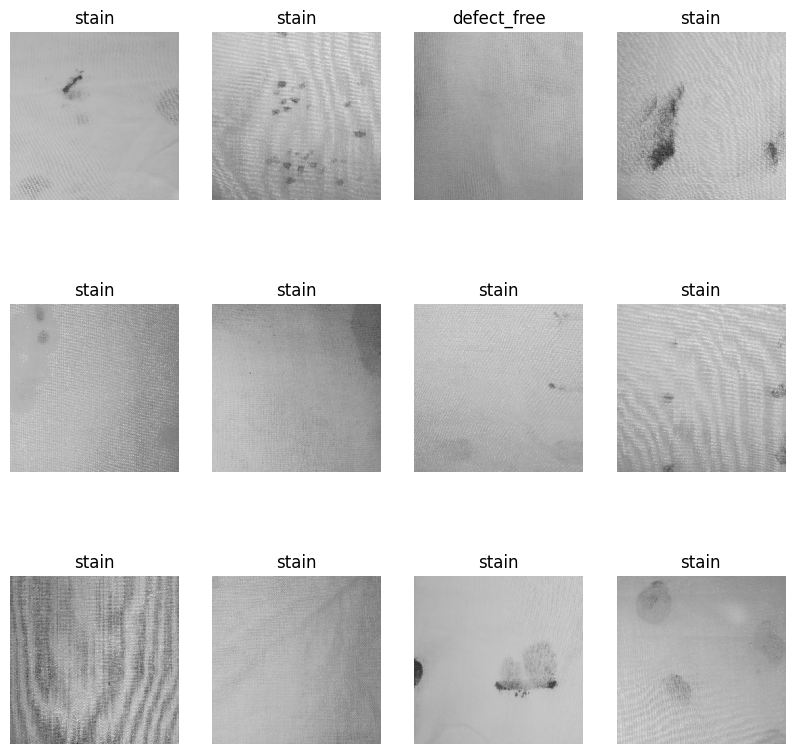

In [12]:

plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [13]:
len(dataset)

15

In [14]:
train_size = 0.7
len(dataset)*train_size

10.5

In [15]:
train_ds=dataset.take(11)
len(train_ds)

11

In [16]:
test_ds = dataset.skip(11)
len(test_ds)

4

In [17]:
val_size=0.1
len(dataset)*val_size

1.5

In [18]:
val_ds=test_ds.take(1)
len(val_ds)

1

In [19]:
test_ds = test_ds.skip(1)
len(test_ds)

3

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [30]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [31]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\jaide\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 250, 250, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 250, 250, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 248, 248, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 124, 124, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 122, 122, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 61, 61, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 59, 59, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 29, 29, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 27, 27, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 13, 13, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 11, 11, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 3, 3, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.8545 - loss: 0.7455 - val_accuracy: 0.8531 - val_loss: 0.4355
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.8629 - loss: 0.4200 - val_accuracy: 0.8531 - val_loss: 0.4231
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - accuracy: 0.8331 - loss: 0.4610 - val_accuracy: 0.8531 - val_loss: 0.4372
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step - accuracy: 0.8170 - loss: 0.5059 - val_accuracy: 0.8531 - val_loss: 0.4348
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 103s 11s/step - accuracy: 0.8831 - loss: 0.3833 - val_accuracy: 0.8531 - val_loss: 0.4555


In [36]:
scores = model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8719 - loss: 0.4386


In [41]:
scores

[0.4555259644985199, 0.8531249761581421]

In [42]:
history

In [43]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 10}

In [44]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [45]:
history.history['accuracy']

[0.8531249761581421,
 0.8531249761581421,
 0.8531249761581421,
 0.8531249761581421,
 0.8531249761581421]

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ValueError: x and y must have same first dimension, but have shapes (50,) and (5,)

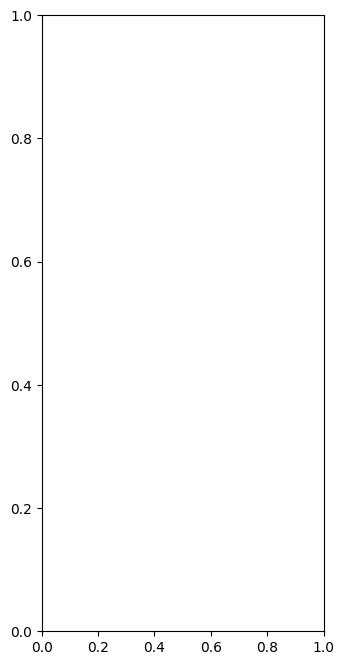

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: stain
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
predicted label: stain


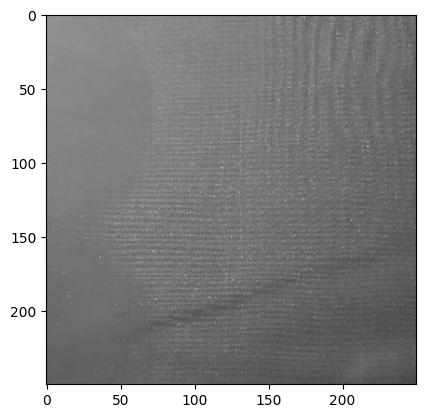

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.image.resize(img,(250,250))
    img_array = tf.expand_dims(img_array, 0)


    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


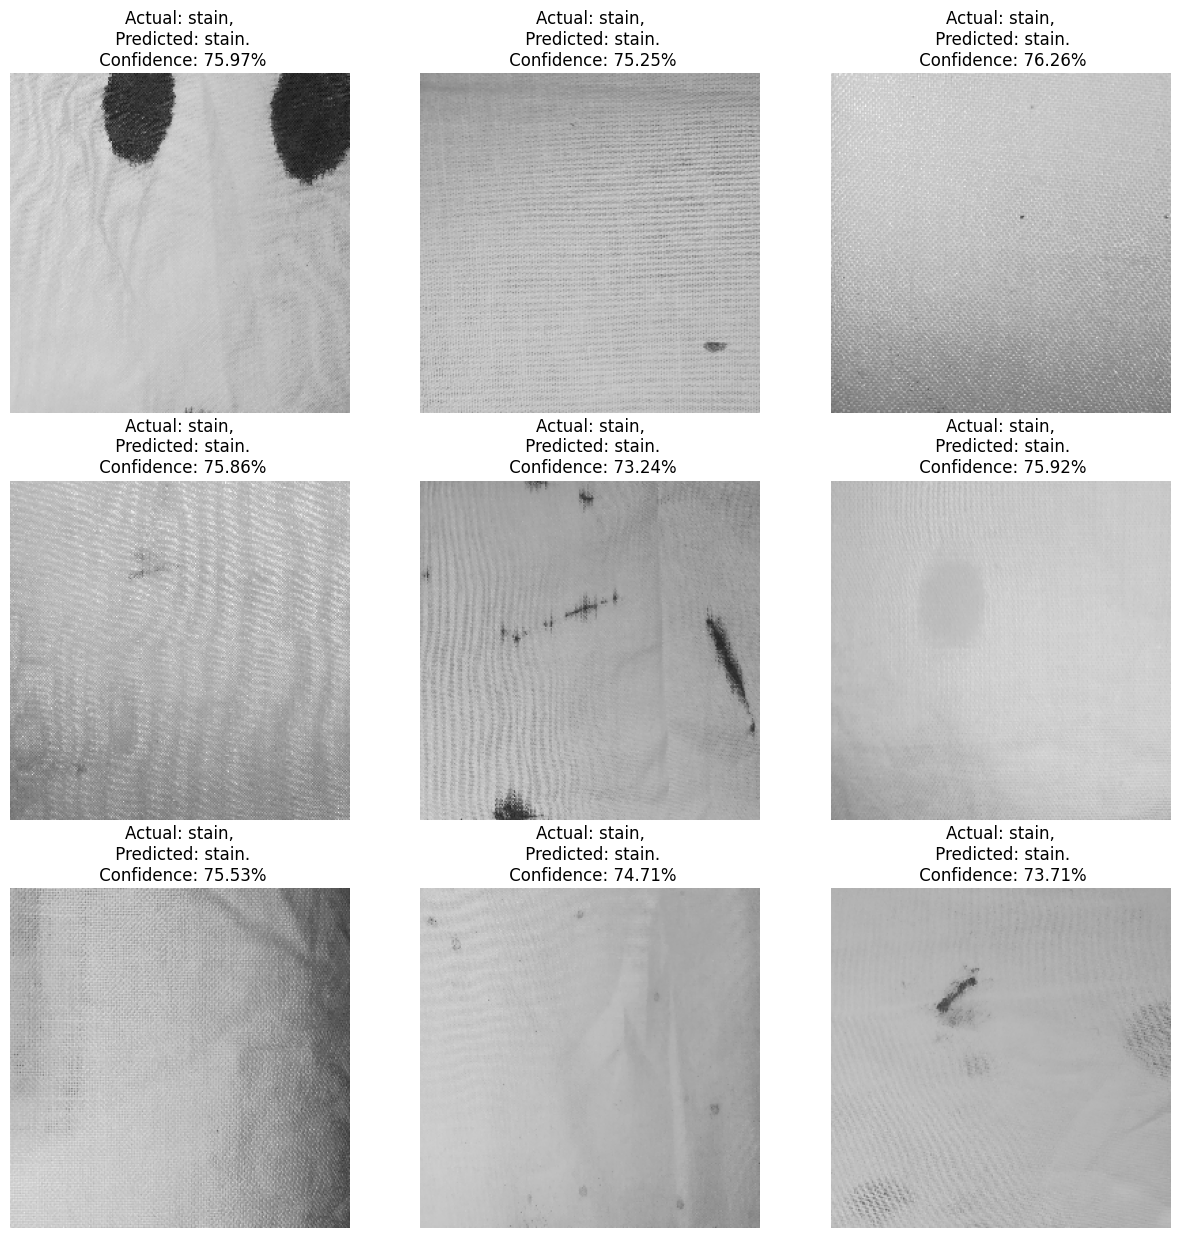

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


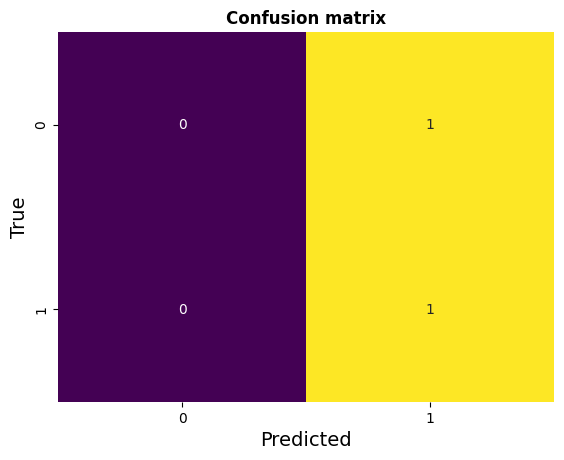

In [53]:
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:  
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

# Confusion matrix
cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')

sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)

plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)

plt.show()

In [54]:
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.85      1.00      0.92       273

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



C:\Users\jaide\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaide\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaide\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [59]:
import os
model_version=2
model.save(f"{model_version}.keras")

In [ ]:
model.save("C:/Users/Harsha/Iron_man/iron_man.keras")

In [ ]:
pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!tensorflowjs_converter --input_format=keras \
    /C:\Users\Harsha\Project\models\silkworm.h5 \
    /C:\Users\Harsha\Project\my_model_tfjs

2024-05-05 13:10:18.781333: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

Traceback (most recent call last):
  File "C:\Users\Harsha\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Harsha\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Harsha\anaconda3\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Users\Harsha\anaconda3\lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\Harsha\anaconda3\lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\Harsha\anacon

In [ ]:
pip install h5py

In [ ]:
import h5py

# Open the HDF5 file in read mode
with h5py.File(r'C:/Users/Harsha/Project/models/silkworm.h5', 'r') as file:
    # List all groups and datasets in the file
    print("Keys: ", list(file.keys()))

    # Access a specific dataset
    dataset = file['C:/Users/Harsha/Project/Images']
    
    # Read data from the dataset
    data = dataset[()]  # This loads the entire dataset into memory
    print("Data shape:", data.shape)
    
    # Access attributes of the dataset
    for key, value in dataset.attrs.items():
        print(f"{key}: {value}")

    


Keys:  ['model_weights', 'optimizer_weights']


KeyError: 'Unable to open object (component not found)'

In [ ]:
import h5py

# Open the HDF5 file
file_path = r'C:/Users/Harsha/Project/Images'
with h5py.File(file_path, 'r') as file:
    # Print the keys
    print("Keys: ", list(file.keys()))

PermissionError: [Errno 13] Unable to open file (unable to open file: name = 'C:/Users/Harsha/Project/Images', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0)

In [ ]:
echo %PYTHONPATH%

%PYTHONPATH%


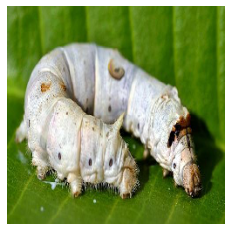

1/1 [==============================] - 0s 59ms/step
Predicted Class Index: undiseased
Confidence: 100.0%


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    #img_array = tf.image.resize(img,(250,250))
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def visualize_prediction(model, image_path):
    # Load the external image
    img = tf.keras.preprocessing.image.load_img(image_path,target_size=(250,250))

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Make a prediction
    predicted_class, confidence = predict(model, img)

    # Display the prediction
    print(f"Predicted Class Index: {predicted_class}\nConfidence: {confidence}%")

# Replace 'path_to_external_image.jpg' with the actual path to your external image
image_path = 'C:/Users/Harsha/Downloads/hi.jpg'
visualize_prediction(model, image_path)


In [ ]:
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('C:/Users/Harsha/Project/models/silkworm.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('C:/Users/Harsha/Project/models/my_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Harsha\AppData\Local\Temp\tmpjj6zlwir\assets


INFO:tensorflow:Assets written to: C:\Users\Harsha\AppData\Local\Temp\tmpjj6zlwir\assets
